<h1>Jupyter notebook to explore the interpretation of the RF model published in: ... </h1>

First import all relevant packages

In [1]:
import pandas
#import numpy as np
#from scipy import stats
import matplotlib.pyplot as plt
#import seaborn
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.model_selection import train_test_split
#from sklearn.multioutput import MultiOutputRegressor
#import pickle
from joblib import dump, load
import shap


Load dataset, split it in X and Y, then load RF model, SHAP explainer and SHAP values

In [2]:
with open('Data.csv', 'r') as handle:
    data  = pandas.read_csv(handle, sep=',', index_col=0, low_memory=False)
    
X = data.iloc[:,:-1]
Y = data.iloc[:,-1:]

RF_model = load('regrRF_KS_besttestparam.joblib.gz')
explainer = load('regrRF_F_WL.explainer.joblib.gz')
shap_values = load('all_SHAPval.joblib.gz')
interaction_vals = load('all_INTERval.joblib.gz')

The sklearn.ensemble.forest module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.
The sklearn.tree.tree module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.tree. Anything that cannot be imported from sklearn.tree is now part of the private API.
Trying to unpickle estimator DecisionTreeRegressor from version 0.21.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.
Trying to unpickle estimator RandomForestRegressor from version 0.21.2 when using version 0.22.1. This might lead to breaking code or invalid results. Use at your own risk.


SHAP summary plot. In this plot the overall importance of all features trough the model is given.
Change the 'n_feat_to_show' variable to change the number of displayed features. Allowed values are 1 to 156.

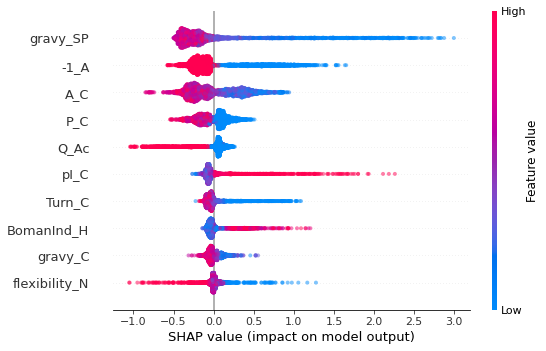

In [3]:
#Insert number of features to display
n_feat_to_show = 10

shap.summary_plot(shap_values, X, max_display=n_feat_to_show, alpha=0.5, plot_type='dot')


To further inspect the model for all SPs, it is possible to draw a decision plot. 
It is possible to display all or only a selection of SPs. Please indicate how may you want to visualize in the 'n_SPs' variable.
You can also highlight one of choice by indicating its position in the 'highligt' variable. Lastly you can decise how many feature to display trought the 'n_feat' variable.

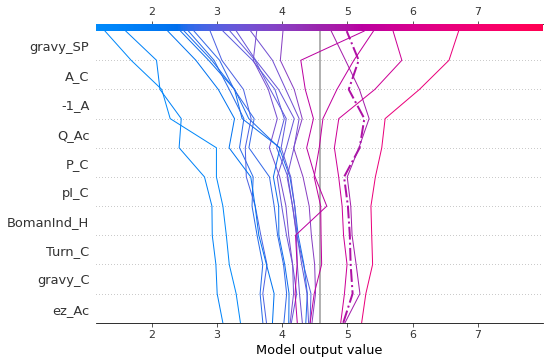

In [4]:
#Insert number of features to display
n_SPs=20
highligt=0
n_feat = 10

shap.decision_plot(explainer.expected_value, shap_values[:n_SPs,:], X.iloc[:n_SPs,:], feature_display_range=slice(None, -1-n_feat, -1), highlight=0)

To inspect a single SP, the force plot is available. Change the 'id_number' variable to visualize a different SP. Allowed values are 0 to 4420.

In [5]:
#Insert SP index number to dispaly
id_number = 4420


shap.initjs() #initiate interactive plot
shap.force_plot(explainer.expected_value, shap_values[id_number,:], X.iloc[id_number,:], plot_cmap=['#7F7F7F','#D66B00'])

The same type of information can be displayed also as a waterfall plot. Change the 'id_number' variable to visualize a different SP. Allowed values are 0 to 4420. You can also decide the number of displayed features, change the 'n_feat_to_show' variable to do so. Allowed values are 1 to 156.

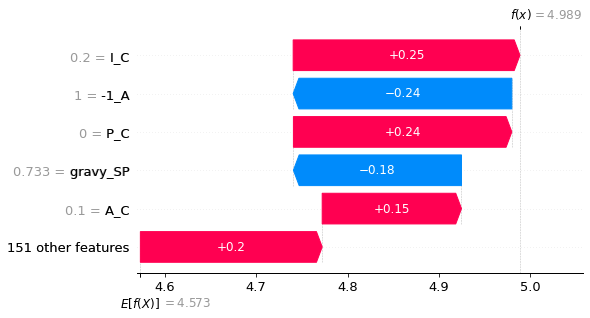

In [6]:
#Insert SP index number to dispaly
id_number = 0
n_feat_to_show = 6


shap.waterfall_plot(explainer.expected_value, shap_values[id_number,:], features=X.iloc[id_number,:], max_display=n_feat_to_show, show=True)

To investigate a single feature, a depndence plot is available. Additionally, it is possible highlight in different hues a second feature, which could be interacting with the first one. You can select the features by chaning the 'first_feat' and 'second_feat' variables. If you set 'second_feat' to None, then no hue is applyed. 

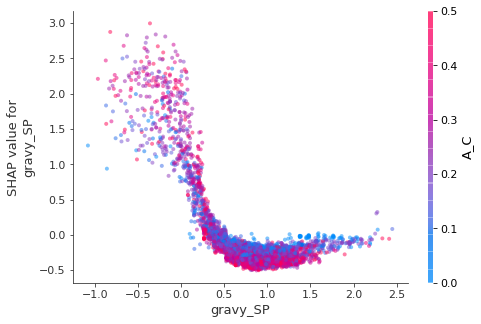

In [7]:
first_feat = 'gravy_SP'
second_feat = 'A_C' # or None (without upper quotes)


shap.dependence_plot(first_feat, shap_values, X, alpha=0.5, x_jitter=0.3, interaction_index=second_feat)

If we are very interested in the interactions occuring between features in the model, we can first of all plot a summary of the interactions.
Change the 'n_feat_to_show' variable to change the number of displayed features. Allowed values are 1 to 156.

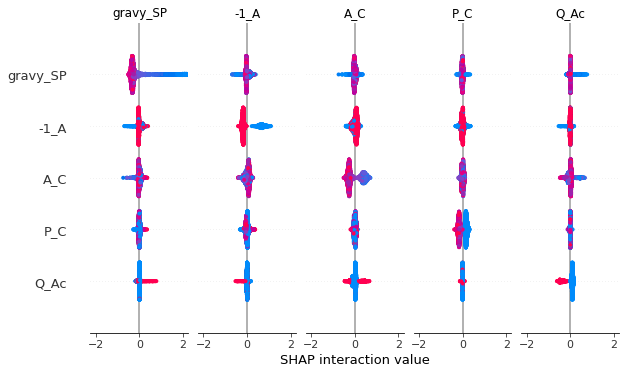

In [8]:
#Insert number of features to display
n_feat_to_show = 5

shap.summary_plot(interaction_vals, X, max_display=n_feat_to_show, alpha=0.5, plot_type='dot')


The same type of information can also be sorted based on the overall impact on the model. Beware, when a single feature is indicated, the main effect is displayed (i.e. the effect they would have if interactions had no role in the model). The strongest interaction is Q_Ac-A_C. All interaction are displayed twice, once from each feature perspective (denoted with '*').

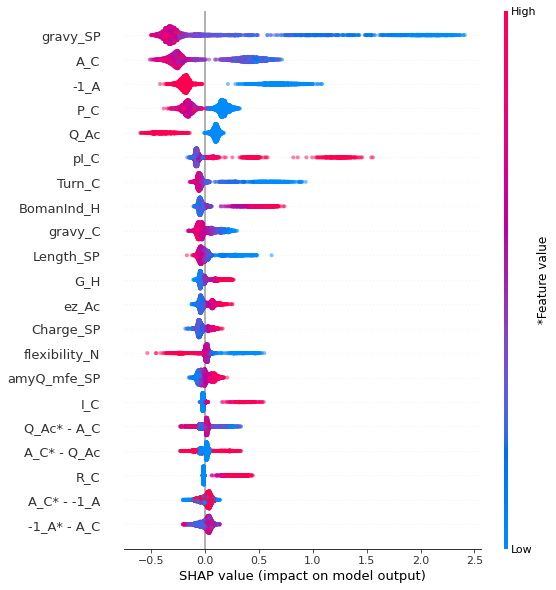

In [9]:
n_feat_to_show = 21

shap.summary_plot(interaction_vals, X, max_display=n_feat_to_show, alpha=0.5, plot_type='compact_dot')

Similarly to the decision plot above, it is possible to create a decision plot also for interspersed main effects and interactions. Please indicate how may you want to visualize in the 'n_SPs' variable. You can also highlight one of choice by indicating its position in the 'highligt' variable. Lastly you can decise how many feature to display trought the 'n_feat' variable.

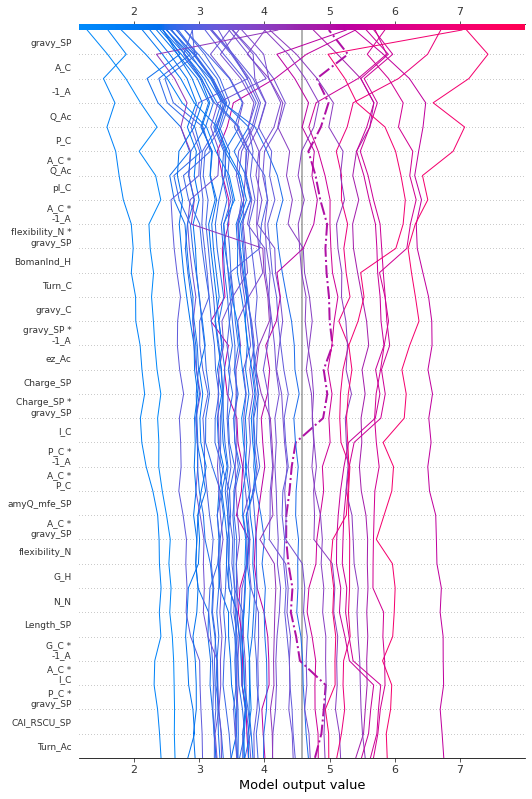

In [10]:
#Insert number of features to display
n_SPs=50
highligt=0
n_feat = 30

shap.decision_plot(explainer.expected_value, interaction_vals[:n_SPs,:], X.iloc[:n_SPs,:], feature_display_range=slice(None, -1-n_feat, -1), highlight=0, ignore_warnings=False)

To further investigate interaction between two desired feature, a dependence plot of the interaction values can be used. You can insert the two desired features in the two variables below. Then 4 plots will be returned, the first two show the main effect of each feature (i.e. the effect they would have if interactions had no role in the model). Then the interaction are shown from both variable perspective. 
The sum of the main effect and the interaction effect results in the overall SHAP value (shown above) for a given feature. 

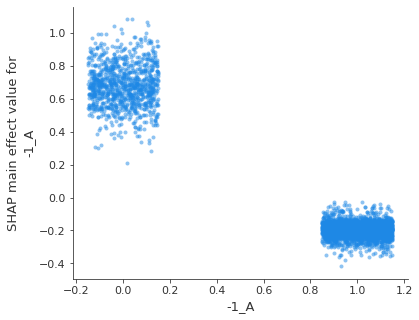

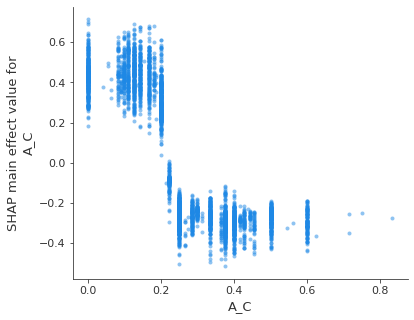

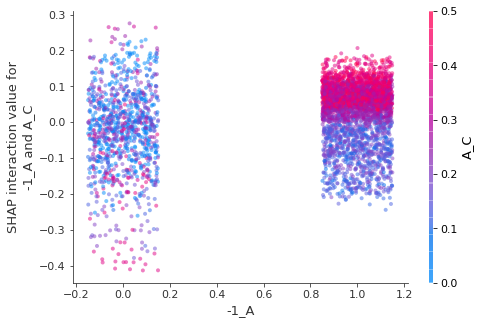

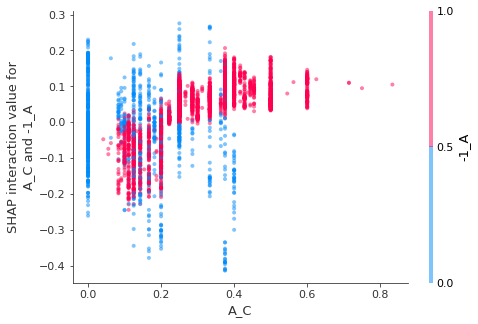

In [11]:
first_feat = '-1_A'
second_feat = 'A_C' # or None (without upper quotes)

shap.dependence_plot((first_feat, first_feat), interaction_vals, X, alpha=0.5, x_jitter=0.3)
shap.dependence_plot((second_feat, second_feat), interaction_vals, X, alpha=0.5, x_jitter=0.3)
shap.dependence_plot((first_feat, second_feat), interaction_vals, X, alpha=0.5, x_jitter=0.3)
shap.dependence_plot((second_feat, first_feat), interaction_vals, X, alpha=0.5, x_jitter=0.3)